# Importing libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import  classification_report, confusion_matrix, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier

# Loading dataset

In [25]:
train = pd.read_csv("datasets/train.csv")
test = pd.read_csv("datasets/test.csv")

In [26]:
X_train, y_train =  train.drop(["Depression"], axis=1), train["Depression"]
X_test, y_test =  test.drop(["Depression"], axis=1), test["Depression"]

# Model training

In [27]:
model =  KNeighborsClassifier()

In [28]:
param_grid = {
    'n_neighbors': np.arange(1, 50),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [29]:
grid_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,  scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

In [30]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy', verbose=2)

# Model Evaluation

In [31]:
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validated Accuracy: {grid_search.best_score_}")

Best Parameters: {'weights': 'distance', 'n_neighbors': 40, 'metric': 'manhattan'}
Best Cross-Validated Accuracy: 0.807733549154967


In [32]:
# Evaluate the model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.67      0.75      2320
           1       0.79      0.91      0.85      3247

    accuracy                           0.81      5567
   macro avg       0.82      0.79      0.80      5567
weighted avg       0.81      0.81      0.81      5567



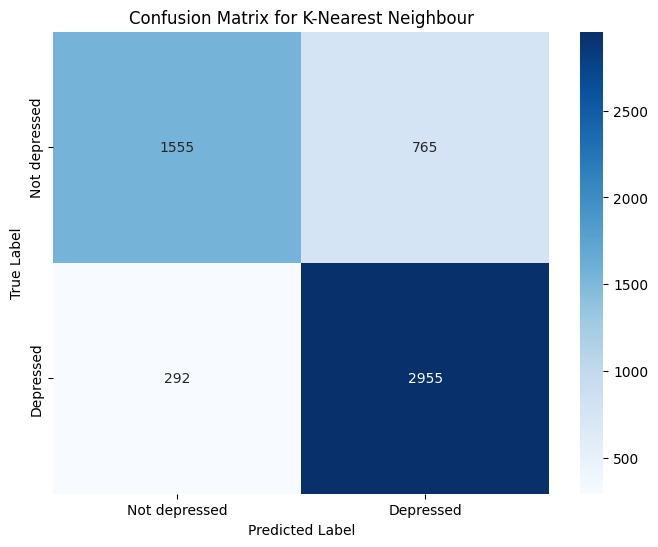

In [33]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not depressed", "Depressed"],
            yticklabels=["Not depressed", "Depressed"])
plt.title("Confusion Matrix for K-Nearest Neighbour")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# AUROC

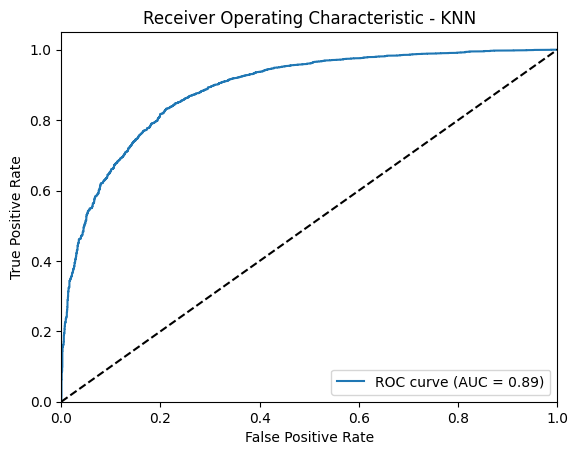

In [34]:
# Predict probabilities
y_prob = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - KNN')
plt.legend(loc="lower right")
plt.show()

# Feature importance

In [35]:
from sklearn.inspection import permutation_importance

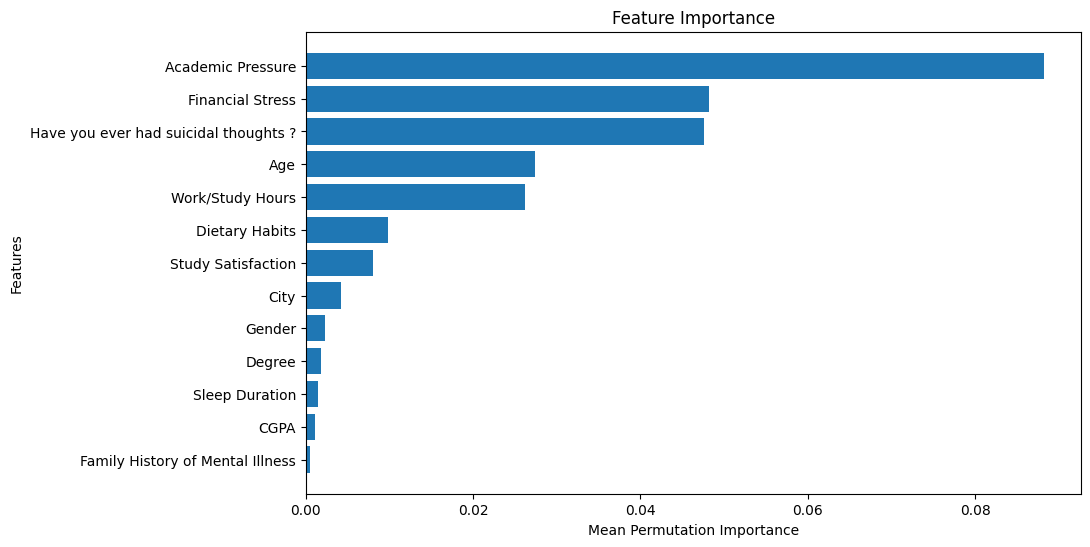

In [36]:
# Feature Importance via Permutation Importance
perm_importance = permutation_importance(best_model, X_test, y_test, scoring='accuracy', random_state=42)

# Plot Feature Importance
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), train.columns[sorted_idx])
plt.title('Feature Importance')
plt.xlabel('Mean Permutation Importance')
plt.ylabel('Features')
plt.show()